# Project: PriceWise – AI-Powered Dynamic Pricing Engine

This project builds a dynamic pricing model for an e-commerce business. We use machine learning to predict customer demand and determine the optimal price that maximizes revenue under different market conditions.

---

### Goals:
- Predict demand based on features like price, weather, and customer type
- Use ML to simulate how pricing impacts revenue
- Build an intelligent pricing engine that selects the best price point

### Tools Used:
- Python (pandas, scikit-learn, seaborn)
- Simulated realistic e-commerce data
- Regression modeling for demand forecasting


In [2]:
# Re-import necessary packages after kernel reset
import pandas as pd
import numpy as np
import random

# Set seed for reproducibility
np.random.seed(42)

# Redefine parameters
num_days = 60
user_types = ["Price-sensitive", "Brand-loyal", "Impulse Buyer", "Average"]
weather_conditions = ["Sunny", "Rainy", "Cloudy", "Snowy"]
days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Define a list of actual product names
product_names = [
    "Smartphone", "Wireless Earbuds", "Bluetooth Speaker", "Gaming Laptop", "Smartwatch",
    "Noise Cancelling Headphones", "Mechanical Keyboard", "4K Monitor", "Portable SSD", "Fitness Tracker",
    "Running Shoes", "Leather Wallet", "Backpack", "Water Bottle", "Sunglasses",
    "Winter Jacket", "Sneakers", "Yoga Mat", "Hiking Boots", "Electric Toothbrush",
    "Air Purifier", "Espresso Machine", "Robot Vacuum", "LED Desk Lamp", "Instant Pot",
    "Hair Dryer", "Standing Desk", "Ergonomic Chair", "Monitor Arm", "Wireless Charger",
    "iPad", "Laptop Stand", "Graphic Tablet", "Tripod", "Camera Drone",
    "Smart Thermostat", "Video Doorbell", "Bluetooth Tracker", "Streaming Stick", "Projector",
    "Camping Tent", "Sleeping Bag", "Power Bank", "Phone Gimbal", "Smart Scale",
    "Microwave", "Dish Rack", "Dehumidifier", "Pet Feeder", "Electric Kettle"
]

# Generate dataset
data_named = []

for day in pd.date_range(start="2025-06-01", periods=num_days):
    for product in product_names:
        base_price = np.round(np.random.uniform(10, 500), 2)
        competitor_price = np.round(base_price + np.random.uniform(-20, 20), 2)
        inventory = np.random.randint(10, 200)
        user_type = random.choice(user_types)
        weather = random.choice(weather_conditions)
        day_of_week = days_of_week[day.dayofweek]
        
        price_diff = competitor_price - base_price
        demand_mean = max(1, 100 - base_price * 0.1 + price_diff * 0.5)

        if user_type == "Price-sensitive":
            demand_mean += 10
        elif user_type == "Brand-loyal":
            demand_mean -= 5
        elif user_type == "Impulse Buyer":
            demand_mean += np.random.randint(-10, 20)

        if weather == "Rainy":
            demand_mean *= 0.9
        elif weather == "Sunny":
            demand_mean *= 1.1

        demand = max(0, int(np.random.normal(demand_mean, 10)))

        data_named.append([
            day.date(), product, base_price, competitor_price,
            user_type, inventory, weather, day_of_week, demand
        ])

# Create DataFrame
df_named = pd.DataFrame(data_named, columns=[
    "date", "product", "base_price", "competitor_price",
    "user_type", "inventory", "weather", "day_of_week", "demand"
])

df_named.head()


,date,product,base_price,competitor_price,user_type,inventory,weather,day_of_week,demand
0,2025-06-01,Smartphone,193.52,211.55,Impulse Buyer,116,Snowy,Sunday,75
1,2025-06-01,Wireless Earbuds,86.44,68.76,Impulse Buyer,97,Snowy,Sunday,95
2,2025-06-01,Bluetooth Speaker,304.55,312.87,Impulse Buyer,159,Cloudy,Sunday,77
3,2025-06-01,Gaming Laptop,99.87,92.04,Impulse Buyer,31,Rainy,Sunday,88
4,2025-06-01,Smartwatch,221.65,213.30,Impulse Buyer,68,Snowy,Sunday,70


# Section 2: Exploratory Data Analysis (EDA)

Before building our dynamic pricing model, we need to explore the data to understand patterns and relationships. Specifically, we'll look at:

- Basic dataset structure and null checks
- Distribution of demand across products
- Price vs demand trends
- Influence of user type and weather
- Correlation heatmap of numerical features


### Dataset Inspection

In [5]:
# Basic structure and sanity checks

# Shape of dataset
print(f"Dataset shape: {df_named.shape}")

# Data types and missing values
display(df_named.info())
display(df_named.describe())

# Check for nulls
df_named.isnull().sum()


Dataset shape: (3000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              3000 non-null   object 
 1   product           3000 non-null   object 
 2   base_price        3000 non-null   float64
 3   competitor_price  3000 non-null   float64
 4   user_type         3000 non-null   object 
 5   inventory         3000 non-null   int64  
 6   weather           3000 non-null   object 
 7   day_of_week       3000 non-null   object 
 8   demand            3000 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 211.1+ KB


None

,base_price,competitor_price,inventory,demand
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,250.775297,250.632910,102.722333,76.477333
std,141.324058,142.137979,55.146136,20.110635
min,10.220000,-6.990000,10.000000,18.000000
25%,129.842500,128.902500,55.000000,62.000000
50%,246.780000,246.270000,101.000000,76.000000
75%,372.895000,375.345000,152.000000,91.000000
max,499.860000,519.280000,199.000000,145.000000


date                0
product             0
base_price          0
competitor_price    0
user_type           0
inventory           0
weather             0
day_of_week         0
demand              0
dtype: int64

### Demand Distribution

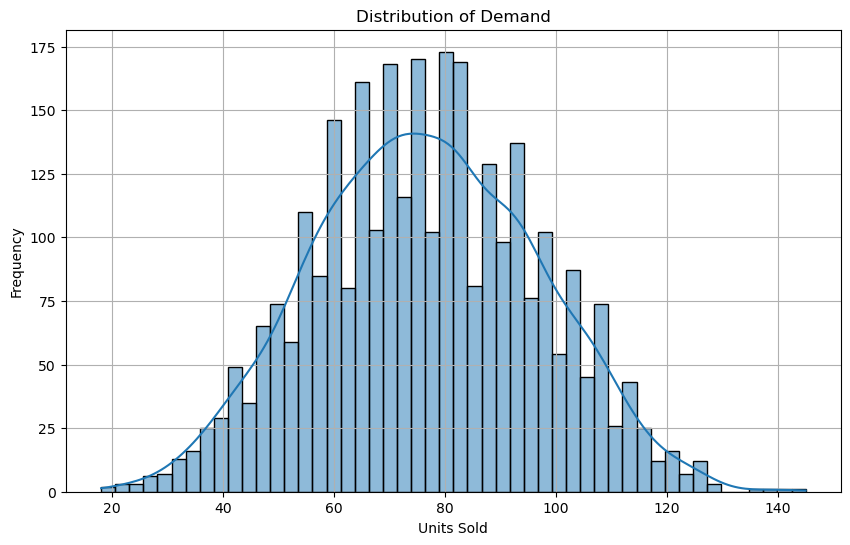

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of demand
plt.figure(figsize=(10, 6))
sns.histplot(df_named['demand'], bins=50, kde=True)
plt.title("Distribution of Demand")
plt.xlabel("Units Sold")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


This histogram helps us understand the overall distribution of demand across products.
We expect some skew due to high-demand or low-priced items.

### Average Demand by Product

C:\Users\nikhi\AppData\Local\Temp\ipykernel_14472\1134421701.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_demand_products.values, y=top_demand_products.index, palette="viridis")


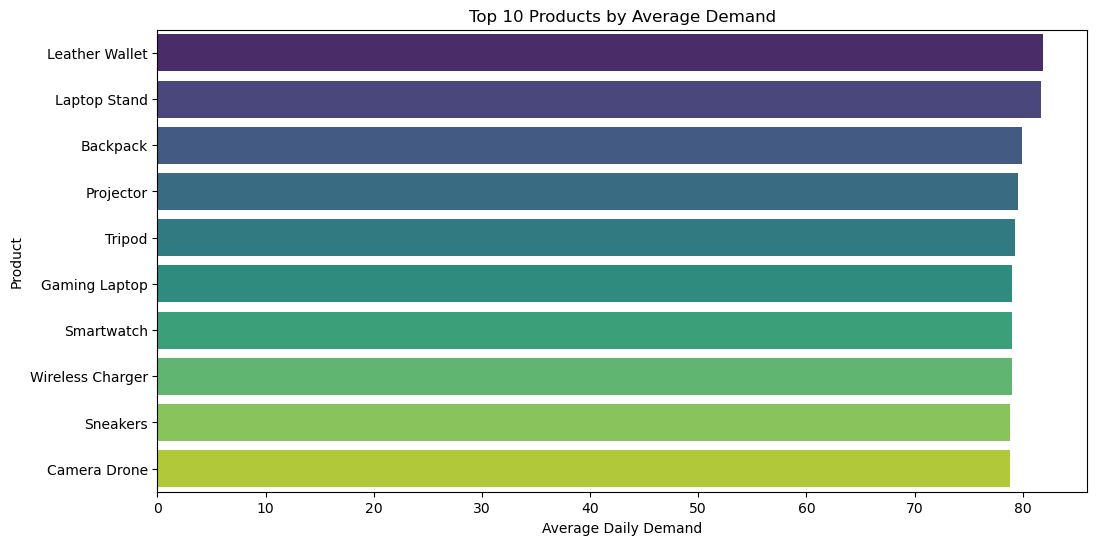

In [10]:
# Top 10 highest demand products on average
top_demand_products = df_named.groupby('product')['demand'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_demand_products.values, y=top_demand_products.index, palette="viridis")
plt.title("Top 10 Products by Average Demand")
plt.xlabel("Average Daily Demand")
plt.ylabel("Product")
plt.show()


This bar chart reveals which products have the highest average daily demand.
We can later use this to segment products by popularity for pricing strategy.

### Price vs Demand

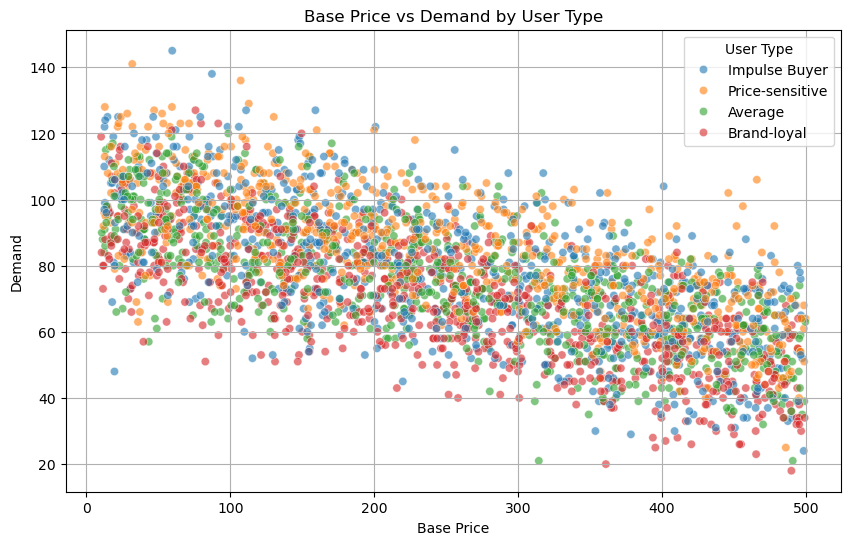

In [13]:
# Scatterplot: Base Price vs Demand
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_named, x="base_price", y="demand", hue="user_type", alpha=0.6)
plt.title("Base Price vs Demand by User Type")
plt.xlabel("Base Price")
plt.ylabel("Demand")
plt.legend(title="User Type")
plt.grid(True)
plt.show()


We expect to see a **negative relationship** between price and demand, especially for price-sensitive users.
Outliers may indicate high-value products with strong brand loyalty.


### Weather & Demand

C:\Users\nikhi\AppData\Local\Temp\ipykernel_14472\4220625831.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_named, x="weather", y="demand", palette="coolwarm")


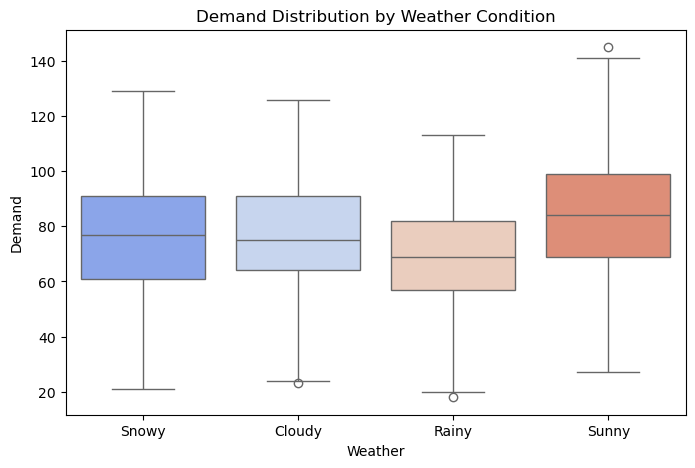

In [16]:
# Boxplot of demand by weather
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_named, x="weather", y="demand", palette="coolwarm")
plt.title("Demand Distribution by Weather Condition")
plt.xlabel("Weather")
plt.ylabel("Demand")
plt.show()


This helps us understand how environmental factors like weather affect product demand.
For example, demand for certain categories (e.g., outdoor gear) may spike on sunny days.


### Correlation Heatmap

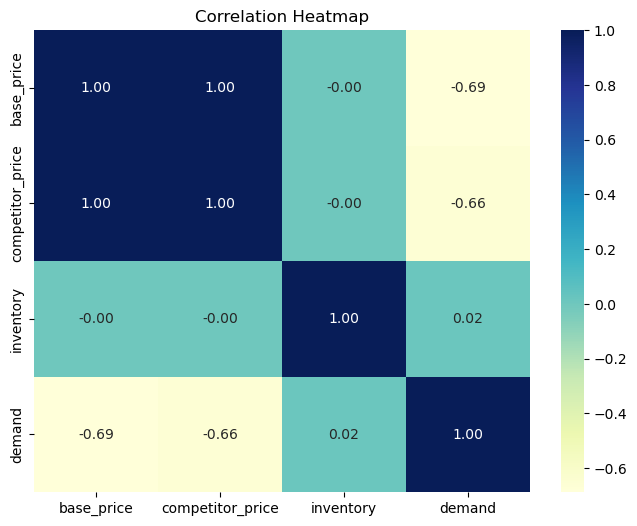

In [19]:
# Correlation matrix (numerical columns)
plt.figure(figsize=(8, 6))
sns.heatmap(df_named[["base_price", "competitor_price", "inventory", "demand"]].corr(), 
            annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


This heatmap shows linear relationships between numeric features.
Strong negative correlation between price and demand will validate our pricing strategy logic.

# Section 3: Demand Prediction Modeling

Our goal is to train machine learning models that predict product demand based on features like:

- Base Price
- Competitor Price
- Inventory
- User Type
- Weather
- Day of Week

We'll try multiple models:
- Linear Regression
- Random Forest Regressor
- Gradient Boosting Regressor

Evaluation Metrics:
- R² Score
- Mean Absolute Error (MAE)
- Root Mean Squared Error (RMSE)


### Data Preprocessing

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Features and target
X = df_named.drop(columns=["demand", "date", "product"])
y = df_named["demand"]

# Define categorical and numeric columns
categorical_features = ["user_type", "weather", "day_of_week"]
numeric_features = ["base_price", "competitor_price", "inventory"]

# One-hot encode categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ]
)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Model 1 – Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression

# Linear Regression Pipeline
linreg_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

linreg_model.fit(X_train, y_train)
y_pred_lr = linreg_model.predict(X_test)

# Evaluation
print("🔹 Linear Regression Performance:")
print(f"R² Score: {r2_score(y_test, y_pred_lr):.3f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr):.2f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_lr, squared=False):.2f}")


🔹 Linear Regression Performance:
R² Score: 0.677
MAE: 9.26
RMSE: 11.37


C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Model 2 – Random Forest

In [27]:
from sklearn.ensemble import RandomForestRegressor

rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("🔹 Random Forest Performance:")
print(f"R² Score: {r2_score(y_test, y_pred_rf):.3f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf):.2f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_rf, squared=False):.2f}")


🔹 Random Forest Performance:
R² Score: 0.604
MAE: 10.21
RMSE: 12.58


C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Model 3 – Gradient Boosting

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
])

gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluation
print("🔹 Gradient Boosting Performance:")
print(f"R² Score: {r2_score(y_test, y_pred_gb):.3f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_gb):.2f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_gb, squared=False):.2f}")


🔹 Gradient Boosting Performance:
R² Score: 0.621
MAE: 10.05
RMSE: 12.32


C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# 💰 Section 4: Dynamic Pricing Engine

We use our trained demand prediction model to simulate pricing decisions.

📊 For a given product and situation:
- We simulate different base prices (e.g., $50 to $300)
- Predict demand at each price using our ML model
- Compute expected revenue (price × demand)
- Choose the price that **maximizes revenue**

This is the core logic behind dynamic pricing systems used by Amazon, Uber, and airline companies.


### Pricing Optimization Function

In [32]:
import numpy as np
import pandas as pd

def optimize_price(product, competitor_price, inventory, user_type, weather, day_of_week, model, price_range=(10, 500), step=5):
    results = []

    # Try different base prices
    for price in np.arange(price_range[0], price_range[1]+step, step):
        test_input = pd.DataFrame([{
            "base_price": price,
            "competitor_price": competitor_price,
            "inventory": inventory,
            "user_type": user_type,
            "weather": weather,
            "day_of_week": day_of_week
        }])
        
        # Predict demand using model
        predicted_demand = model.predict(test_input)[0]
        
        # Clip negative demand
        predicted_demand = max(predicted_demand, 0)

        # Calculate revenue
        revenue = price * predicted_demand

        results.append((price, predicted_demand, revenue))

    results_df = pd.DataFrame(results, columns=["Price", "Predicted Demand", "Revenue"])
    best_row = results_df.loc[results_df["Revenue"].idxmax()]
    
    return best_row, results_df


### Pricing Optimization Function Example: Wireless Earbuds

🎯 Optimal Pricing Decision:
Price                 180.000000
Predicted Demand      113.923446
Revenue             20506.220206
Name: 34, dtype: float64


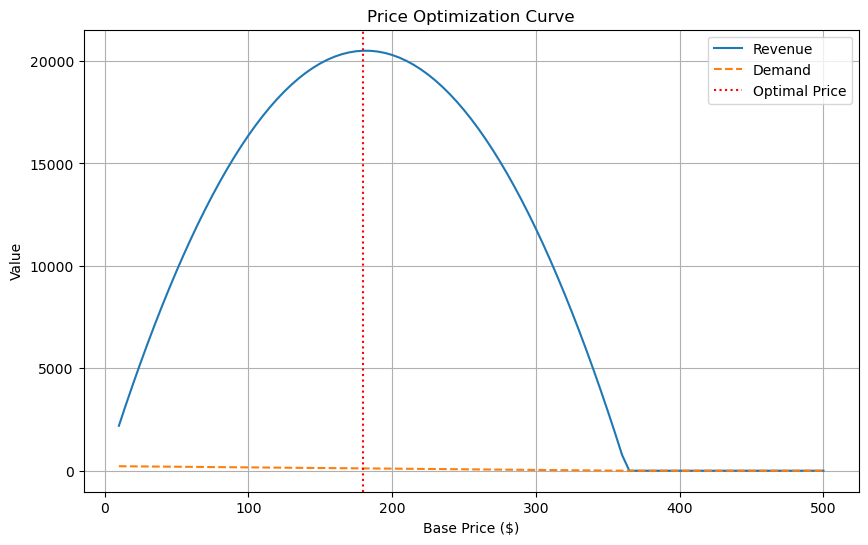

In [34]:
# Example inputs (simulate a scenario)
best_price, all_prices = optimize_price(
    product="Wireless Earbuds",
    competitor_price=210,
    inventory=80,
    user_type="Price-sensitive",
    weather="Sunny",
    day_of_week="Friday",
    model=linreg_model
)

# Show the optimal price decision
print("🎯 Optimal Pricing Decision:")
print(best_price)

# Plot price vs revenue
plt.figure(figsize=(10, 6))
sns.lineplot(data=all_prices, x="Price", y="Revenue", label="Revenue")
sns.lineplot(data=all_prices, x="Price", y="Predicted Demand", label="Demand", linestyle="--")
plt.axvline(best_price['Price'], color='red', linestyle=':', label='Optimal Price')
plt.title("Price Optimization Curve")
plt.xlabel("Base Price ($)")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


In [49]:
import os
os.getcwd()


'C:\\Users\\nikhi\\OneDrive\\Desktop\\Python'

In [57]:
import joblib
joblib.dump(linreg_model, "C:/Users/nikhi/OneDrive/Desktop/Python/linreg_model.pkl")


['C:/Users/nikhi/OneDrive/Desktop/Python/linreg_model.pkl']